In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import numpy as np
import numba
from numba import jit
import empyrical as emp
import random
import tushare as ts
from common.config import Config

CONF = Config('../conf/secret.yaml').data[0]
ts_token = CONF['TUSHARE']['TOKEN']
ts.set_token(ts_token)
pro = ts.pro_api()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# for today in pd.period_range(start='2005-01-01', end='2018-01-01', freq='D'):
#     if today.dayofyear < 5:
#         TARGET = pro.index_weight(index_code='399300.SZ', trade_date=today.strftime('%Y%m%d'),)
#         TARGET = list(TARGET['con_code'])
#         TARGET = [x.split('.')[0] for x in TARGET]
#         HS300 += TARGET
#         time.sleep(1)
# HS300 = list(set(HS300))

# pro.index_weight(index_code='399300.SZ', trade_date=today.strftime('%Y%m%d'),)
# pro.index_weight(index_code='399300.SZ')
# pro.index_weight(index_code='399300.SZ', start)
# df = ts.get_report_data(2018, 1)
# df.sort_values(by='roe', ascending=False)
df[df.code == '600309']

# df2 = pro.fina_indicator(ts_code='600309.SH')
df2.columns
# df2.loc[:, ['ts_code', 'ann_date', 'eps', 'eps_yoy', 'roe']]

# df3 = pro.daily_basic(ts_code='600309.SH', trade_date='')
df3.columns

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

result_list = [
    ('../database/20181009-2005-2008-MA-ALL-RANDOM.csv', 'r', 'MA-ALL-RANDOM', 'o'),
    ('../database/20181009-2005-2008-MA-SORT-RANDOM.csv', 'g', 'MA-SORT-RANDOM', '^'),
#     ('../database/20181009-2015-2018-MA-ALL-RANDOM-MARKETUP.csv', 'b', 'MA-ALL-RANDOM-MUP', '^'),
#     ('../database/20181009-2015-2018-MA-ALL-RANDOM.csv', 'c', 'MA-ALL-RANDOM', '^'),
#     ('../database/20181009-2015-2018-MA-SORT-RANDOM.csv', 'y', 'MA-SORT-RANDOM', '^'),
    
]

ax = None

for result in result_list:
    df = pd.read_csv(result[0])
    result[2]
    df.describe()
    ax = df.plot(kind='scatter', x='RETURN', y='MAXDROPDOWN', color=result[1], label=result[2], marker=result[3], alpha=0.5, grid=True, ax=ax)

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [15, 10]

df = pd.DataFrame(columns=['x', 'y'], data=[])
df['x'] = [1, 2 ,3, 4]
df['y'] = df['x'] * 2
df

# fig, ax = plt.subplots()
ax = df.plot(kind='line', x='x', y='y')
# ax.fill(df['x'], df['y'])
# plt.fill_between(x, y, interpolate=True, color='green', alpha=0.5)
plt.fill_between(df.loc[1:2, 'x'], df.loc[1:2, 'y'], interpolate=True, color='green', alpha=0.5)

# plt.plot([0, 2], [0, 2])
plt.text(2, 4, 'B-4')


In [ ]:
df = pd.read_csv('../database/20180927-151028.csv')
df = df.loc[:, ['TURTLE_POS', 'RETURN', 'MAXDROPDOWN']]
# df
df[df.TURTLE_POS == 10].describe()
df[df.TURTLE_POS == 20].describe()
df[df.TURTLE_POS == 30].describe()

In [ ]:
import pandas as pd
import datetime
import os
import numpy as np
from pandas.compat import StringIO
from pandas.io.common import urlopen
from IPython.display import display, display_pretty, Javascript, HTML
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt

# Data retrieved from http://www.quandl.com/api/v1/datasets/ODA/DEU_PCPIPCH.csv?column=1
data = """Date,Value\n2019-12-31,1.7\n2018-12-31,1.7\n2017-12-31,1.7\n2016-12-31,1.5\n2015-12-31,1.247\n2014-12-31,0.896\n2013-12-31,1.601\n2012-12-31,2.13\n2011-12-31,2.498\n2010-12-31,1.158\n2009-12-31,0.226\n2008-12-31,2.738\n2007-12-31,2.285\n2006-12-31,1.784\n2005-12-31,1.92\n2004-12-31,1.799\n2003-12-31,1.022\n2002-12-31,1.346\n2001-12-31,1.904\n2000-12-31,1.418\n1999-12-31,0.626\n1998-12-31,0.593\n1997-12-31,1.542\n1996-12-31,1.19\n1995-12-31,1.733\n1994-12-31,2.717\n1993-12-31,4.476\n1992-12-31,5.046\n1991-12-31,3.474\n1990-12-31,2.687\n1989-12-31,2.778\n1988-12-31,1.274\n1987-12-31,0.242\n1986-12-31,-0.125\n1985-12-31,2.084\n1984-12-31,2.396\n1983-12-31,3.284\n1982-12-31,5.256\n1981-12-31,6.324\n1980-12-31,5.447\n"""
df = pd.read_csv(StringIO(data), index_col=0, parse_dates=True)
df = df.sort_index()
display_charts(df, chart_type="stock", title="Germany inflation rate")

In [ ]:
@numba.jit
def test(df, idx):
    return df.loc[idx]

@numba.jit
def test2(df, idx):
    arr = df.to_records(index=True)
    return arr[arr.index==idx]

df = pd.DataFrame(columns=['a', 'b', 'N'], data=[[1, 2, 3], [3, 6, 9], [5, 10, 15]]*1)
# %timeit test(df, 2)
# %timeit df.loc[2]
arr = df.to_records(index=True)
df
arr
df.loc[2]
arr[arr.index==2]
%timeit df.loc[2]
%timeit df.to_records(index=True)
%timeit arr[arr.index==2]
# %timeit test2(df, 2)
d = df.loc[2]
ar = arr[arr.index==2]
%timeit 2 in df.index
%timeit 2 in arr.index
%timeit d.a > d.N
%timeit ar.a > ar.N

In [ ]:
@numba.jit
def f_plain(x):
   return x * (x - 1)

@numba.jit
def integrate_f_numba(a, b, N):
   s = 0
   dx = (b - a) / N
   for i in range(N):
       s += f_plain(a + i * dx)
   return s * dx

@numba.jit
def apply_integrate_f_numba(col_a, col_b, col_N):
   n = len(col_N)
   result = np.empty(n, dtype='float64')
   assert len(col_a) == len(col_b) == n
   for i in range(n):
      result[i] = integrate_f_numba(col_a[i], col_b[i], col_N[i])
   return result

def compute_numba(df):
   result = apply_integrate_f_numba(df['a'].values, df['b'].values, df['N'].values)
   return pd.Series(result, index=df.index, name='result')


df = pd.DataFrame(columns=['a', 'b', 'N'], data=[[1, 2, 3], [3, 6, 9], [5, 10, 15]]*1)
%timeit compute_numba(df)
compute_numba(df)

In [ ]:
d = {
        'START': 1,
        'END': 2,
    }
d

df = pd.DataFrame(columns=[
    'START',
    'END',
])

# df = pd.DataFrame.from_dict(d)
# df = pd.DataFrame.from_records(d)
s = pd.Series(d)
s

df.append(s, ignore_index=True)

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import time
    
result = []
    
def work(job_cnt):
    return time.time(), job_cnt

def when_done(r):
    result.append(r.result())

def main():
#     params = itertools.product(, )
    params = list(range(1, 10, 1))
#     print(params)
    with ProcessPoolExecutor(1) as pool:
        for job_cnt in params:
            future_result = pool.submit(work, job_cnt)
            future_result.add_done_callback(when_done)
    
if __name__ == '__main__':
    main()
    print(result)

# __name__
# main()

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [18, 10]

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, c=c, marker=m)

df = pd.read_csv('../database/ALL.csv')
# df = pd.read_csv('../database/2014-2018.csv')
X = df['TURTLE_POS']
Y = df['ROLLMAX']
Z = df['RETURN']

md = Z.median()

df_d = df.loc[df['RETURN'] >= md]
X = df_d['TURTLE_POS']
Y = df_d['ROLLMAX']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='r', marker='o')
ax.bar(X, Z, zs=Y, zdir='y', color='r', alpha=0.2)

df_d = df.loc[df['RETURN'] < md]
X = df_d['TURTLE_POS']
Y = df_d['ROLLMAX']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='b', marker='^')
ax.bar(X, Z, zs=Y, zdir='y', color='b', alpha=0.2)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')


# ax.set_yticks(Y)

Index(['START', 'END', 'TURTLE_POS', 'ROLLMAX', 'ROLLMIN', 'MA_SHORT',
       'MA_LONG', 'X_DAY_RETURN', 'ORDER', 'STOCK', 'RETURN', 'MAXDROPDOWN',
       'WINRATE', 'annual_return', 'annual_volatility', 'calmar_ratio',
       'sharpe_ratio', 'alpha', 'beta', 'ALL_DAYS', 'FREECASH_DAY',
       'MISS_SIGNAL', 'RET_PER_YEAR', 'BENCHMARK_RETURN', 'LASTYEAR_RETURN'],
      dtype='object')

ROLLMAX ROLLMIN RETURN                                                    \
                    count      mean       std       min       25%       50%   
0       10      10   10.0  0.128033  0.080256  0.058186  0.075714  0.103982   
1       10      20   10.0  0.183806  0.087828  0.053263  0.130496  0.194460   
2       10      30   10.0  0.113527  0.071644  0.020699  0.062429  0.097331   
3       10      40   10.0 -0.006290  0.051582 -0.057164 -0.047689 -0.029528   
4       10      50   10.0  0.150266  0.095740  0.028866  0.083582  0.128407   
5       10      60   10.0  0.132222  0.068969  0.037735  0.077688  0.131386   
6       10      70   10.0  0.225213  0.052504  0.145024  0.204267  0.223671   
7       10      80   10.0  0.207038  0.047931  0.130268  0.167859  0.217582   
8       10      90   10.0  0.241310  0.082759  0.124614  0.178665  0.234291   
9       10     100   10.0  0.263438  0.047346  0.186444  0.235105  0.268054   
10      20      10   10.0  0.154258  0.044296  0.078116  0.118938  0.158750   
11      20      20   10.0  0.319723  0.090173  0.207766  0.265770  0.301023   
12      20      30   10.0  0.235053  0.063971  0.175008  0.191973  0.211447   
13      20      40   10.0  0.221653  0.067844  0.130780  0.197307  0.212055   
14      20      50   10.0  0.327729  0.090001  0.188215  0.257374  0.348053   
15      20      60   10.0  0.222593  0.090473  0.072334  0.171885  0.208386   
16      20      70   10.0  0.257814  0.059399  0.170619  0.239070  0.251363   
17      20      80   10.0  0.250954  0.066689  0.143782  0.221430  0.232965   
18      20      90   10.0  0.263223  0.061922  0.183458  0.225277  0.257393   
19      20     100   10.0  0.256595  0.053868  0.190637  0.215381  0.242521   
20      30      10   10.0  0.251823  0.094947  0.090543  0.211347  0.236731   
21      30      20   10.0  0.370270  0.095999  0.207728  0.319170  0.389677   
22      30      30   10.0  0.254345  0.061170  0.126733  0.238352  0.247653   
23      30      40   10.0  0.361042  0.067248  0.272058  0.312529  0.348530   
24      30      50   10.0  0.402181  0.063585  0.317624  0.351499  0.402078   
25      30      60   10.0  0.358792  0.070964  0.207427  0.334996  0.360668   
26      30      70   10.0  0.314557  0.074151  0.165537  0.284389  0.339272   
27      30      80   10.0  0.339663  0.090160  0.227399  0.256272  0.336777   
28      30      90   10.0  0.408314  0.062154  0.355512  0.368999  0.391959   
29      30     100   10.0  0.476170  0.075692  0.309636  0.448163  0.492981   
..     ...     ...    ...       ...       ...       ...       ...       ...   
70      80      10   10.0  0.528260  0.081876  0.411165  0.484413  0.502588   
71      80      20   10.0  0.539378  0.081585  0.450797  0.476579  0.515033   
72      80      30   10.0  0.466246  0.087399  0.326101  0.402362  0.484675   
73      80      40   10.0  0.625643  0.074354  0.515321  0.581290  0.632393   
74      80      50   10.0  0.821619  0.075446  0.660468  0.798863  0.821829   
75      80      60   10.0  0.621075  0.111825  0.466496  0.550914  0.606808   
76      80      70   10.0  0.508113  0.072546  0.399795  0.470074  0.502094   
77      80      80   10.0  0.555903  0.107879  0.296053  0.537762  0.579034   
78      80      90   10.0  0.595871  0.085353  0.428562  0.559262  0.595428   
79      80     100   10.0  0.607670  0.067071  0.527569  0.550964  0.612602   
80      90      10   10.0  0.563463  0.072788  0.478029  0.498958  0.545904   
81      90      20   10.0  0.559627  0.058626  0.476126  0.521793  0.539932   
82      90      30   10.0  0.479867  0.071004  0.364667  0.423893  0.491676   
83      90      40   10.0  0.684103  0.061073  0.599634  0.650379  0.670356   
84      90      50   10.0  0.769277  0.059199  0.702295  0.729542  0.746690   
85      90      60   10.0  0.588633  0.070435  0.477085  0.544223  0.581650   
86      90      70   10.0  0.536576  0.063869  0.458349  0.480777  0.536798   
87      90      80   10.0  0.590615  0.064032  0.4624

Index(['ROLLMAX', 'ROLLMIN', 'RETURN'], dtype='object')

,ROLLMAX,ROLLMIN,RETURN
0,10,10,0.128033
1,10,20,0.183806
2,10,30,0.113527
3,10,40,-0.006290
4,10,50,0.150266
5,10,60,0.132222
6,10,70,0.225213
7,10,80,0.207038
8,10,90,0.241310
9,10,100,0.263438


<Container object of 25 artists>

<Container object of 75 artists>

Text(0.5,0,'X ROLLMAX')

Text(0.5,0,'Y ROLLMIN')

Text(0.5,0,'Z RETURN')

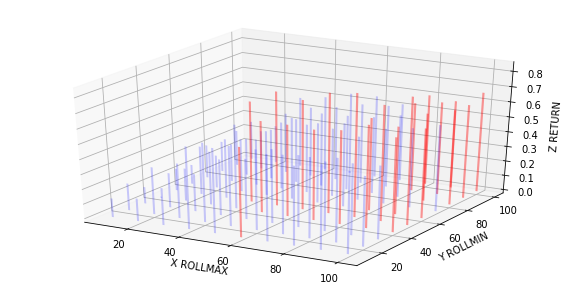

In [7]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

df = pd.read_csv('../database/2014-2018-TT-PARAMTEST-MA-ALLRANDOM.csv')

df.columns
# df.head(2)

df = df.loc[:, ['ROLLMAX', 'ROLLMIN', 'RETURN']]

d_df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).describe().reset_index()
d_df

# df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).describe().reset_index()
df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).mean().reset_index()
df.columns
df


X = df['ROLLMAX']
Y = df['ROLLMIN']
Z = df['RETURN']
# ax.scatter(X, Y, Z, c='b', marker='o')
# ax.bar(X, Z, zs=Y, zdir='y', color='b', alpha=0.2, hatch='', linestyle='dashdot')
# X, Y, Z = axes3d.get_test_data(0.05)
# X
# Z
# ax.plot_wireframe(X, Y, Z)

md = Z.median()
md = Z.mean()
md = Z.describe(percentiles=[.75, .90, .95])['75%']
# .norm.interval(0.96,mean,std)

df_d = df.loc[df['RETURN'] >= md]
X = df_d['ROLLMAX']
Y = df_d['ROLLMIN']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='r', marker='o')
ax.bar(X, Z, zs=Y, zdir='y', color='r', alpha=0.4)

df_d = df.loc[df['RETURN'] < md]
X = df_d['ROLLMAX']
Y = df_d['ROLLMIN']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='b', marker='^')
ax.bar(X, Z, zs=Y, zdir='y', color='b', alpha=0.2)

ax.set_xlabel('X ROLLMAX')
ax.set_ylabel('Y ROLLMIN')
ax.set_zlabel('Z RETURN')

# ax.set_yticks(Y)

df = df.loc[:, ['ROLLMAX', 'ROLLMIN', 'RETURN']]
# df[df['TURTLE_POS'] == 10]

In [ ]:
start_date = '2017-01-02'
end_date = '2018-08-01'
for today in pd.period_range(start=start_date, end=end_date, freq='D'):
    # 每年年初计算回报率
    if today.dayofyear == 1:
        today.strftime('%Y%m%d') == '20180101'
        print(today, type(today))
        print(today.year)
        print(today.end_time)
        print(today.qyear)
        print(today.start_time)
        lastyear_firstday = '%d-01-01' % (today.year - 1)
        lastyear_firstday = pd.to_datetime(lastyear_firstday)
        lastyear_firstday = lastyear_firstday.to_period(freq='D')
        print(lastyear_firstday, type(lastyear_firstday))
        

In [ ]:
%%time

# df = pd.DataFrame([1], columns=['A'])
# df

# df = pd.DataFrame(columns=['A'])
# for i in range(3000):
#     df = df.append({'A': i}, ignore_index=True)
# print(df)

# print([1]*10)
# r = np.random.randint(low=0, high=10, size=(1, 4))
# print(r)
r = [[3, 5, 7, 4]]

## Wall time: 2.78 s
# df = pd.DataFrame(r, columns=list('ABCD'))
# dd = pd.DataFrame(r, columns=list('ABCD'))
# de = pd.DataFrame(columns=list('ABCD'))
# for i in range(100 * 100):
#     dd = pd.Series({'A':1, 'B':2, 'C':3, 'D':4})
#     dd = de.append(dd, ignore_index=True)
# #     df = df.append(dd, ignore_index=True)
# #     df = df.append({'A':1, 'B':2, 'C':3, 'D':4}, ignore_index=True)
# #     dd = pd.DataFrame(r, columns=list('ABCD'))
# #     df = pd.concat([df, dd], ignore_index=True)
# print(len(df))
# print(dd)
# ### 714 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
# %timeit l = df.loc[df.A == 3]
# print(len(l))


### Wall time: 5 ms
r = {'A':3, 'B':5, 'C':7, 'D':4}
dd = []
for i in range(100 * 100):
    dd.append(r)
df = pd.DataFrame(dd, columns=list('ABCD'))
print(len(df))
# %timeit l = df.loc[df.A == 3]
%timeit l = df.loc[100]

# arr = df.to_records(index=False)
# arr.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], axis=0)
# print(len(arr))

# def find_s(dd):
#     ret = []
#     for i in range(len(dd)):
#         ci = dd[i]
#         if ci['A'] == 3 and ci['B'] == 5:
#             ret.append(i)
#     return ret
# ### 2.77 ms ± 63.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# %timeit l = find_s(dd)
# print(len(l))

# df = pd.DataFrame([{'A':1, 'B':2}, {'A':3, 'B':4}], columns=list('AB'))
# print(df)

In [ ]:
df = pd.period_range(start='2018-01-01', end='2018-06-01', freq='D')
dt = pd.to_datetime('2018-06-01') - pd.to_datetime('2018-01-01')
dt.days
365 / dt.days

dt = pd.to_datetime('2018-06-01')
dt
df[0].to_timestamp()

d = dt - df[0].to_timestamp()
d.days

df[5]
df[0]
df[5] - df[0]

In [ ]:
df = pd.DataFrame(columns=['a', 'b'], data=[[1, 2], [3, 6], [5, 10]]*2)
df
set(df.a)
list(df.a)

df[df.a == 3]
df[df.a == 3].index
# %timeit len(df[df.a == 3])
# df.index.where(4)
df.index.get_loc(3)

n = df.values

n[df.index.get_loc(3)]

# n[n[:, 0] == 3]
# n[(n[:, 0] == 3) & (n[:, 1] == 6)]
# # %timeit len(n[n[:, 0] == 3])

# type(df.columns)

In [ ]:
%%timeit
df = pd.DataFrame(columns=['a', 'b'], data=[[1, 2], [3, 6], [5, 10]]*10)
# df['c'] = df.a[1:3] - df.b[1:3].values
print(df)

# df['c'] = pd.np.nan

# %timeit df.loc[:2, 'c'] = (df.a[1:3] - df.b[1:3].values).reset_index(drop=True)

# df.loc[3:5, 'c'] = df.a[1:3] - df.b[1:3].values

# df.c[3:5] = df.a[1:3] - df.b[1:3].values

# df.loc[3:5, 'c'] = df.a[1:3].values - df.b[1:3].values

# df[1:3].c = df.a[1:3] - df.b[1:3].values

# print(df)

# c = df.c[3:5]
# print(type(c))
# print(c)

# v = df.a[1:3].values - df.b[1:3].values
# print(type(v))
# print(v)

# s = df.a[1:3] - df.b[1:3].values
# print(type(s))
# print(s)
# print(s.reset_index(drop=True))
# df['c'] = df['c'].apply(lambda x: 'UP' if x < 0 else 'DOWN')
# df

# print(df['b'].shift(1))
# print(df['b'])
# s = df['b'] - df['b'].shift(1)
# s = s.reset_index(drop=True, inplace=True)
# s.shift(-1)
# print(s)

# print(df['b'].diff(1))
# print(df['b'].diff(4))

# %timeit df.loc[2, 'b'] - df.shift(2).loc[2, 'b']
# print(df.shift(2).loc[2])

# df['b'].rolling(2).mean()
# df['b'].rolling(10).max()
df['b'].rolling(10).min()

In [ ]:
import numpy as np
arr = np.array([[2,3,1,0], [2,3,1,0], [3,2,1,1]])
%timeit d = len(arr)
%timeit f = arr.shape[0]
%timeit c = d

In [ ]:
df = pd.DataFrame(columns=['a', 'b'], data=[[1, 2], [3, 6], [5, 10]]*1000)
# df

%timeit df['b'].rolling(10).min()
%timeit df.loc[:, 'b'].rolling(10).min()
%timeit df['b'].rolling(20).min()
# %timeit df['b'].rolling(20).min()
# %timeit min(df.loc[i-10:i, 'b'])

%timeit '2931' not in df.index

In [ ]:
%%timeit
for i in df.index:
    d = min(df.loc[i-10:i, 'b'])

In [ ]:
df = pd.DataFrame(columns=['a', 'b'], data=[[1, 2], [3, 6], [5, 10]]*3)
df = df.drop(index=5)
df

today = 6
df.shift(1).loc[today, 'b']